# File and libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


filepath=r'data/df_merch_2_encoded.csv'

file_tag = "Google Merch Shop"

# DSLabs functions

In [2]:
%run "scripts/dslabs_functions.py"


# Data functions

In [3]:
%run "scripts/data_functions.py"


data_functions lodaded


# Load

In [4]:
# test_data=True
test_data=False

if test_data==True:

    data=pd.read_csv(filepath)

    # 1% sample
    data=data.sample(frac=0.01, replace=False)
    

else:
    data=pd.read_csv(filepath)
    # 50% sample
    # data=data.sample(frac=0.5, replace=False)

 
target='returning_user'
target_metric='f2'

# ensure sorting by day_of_year for correct splitting 
# "When in the presence of temporal data, data partition shall use older data to train and newer to test, in order to not use future data to classify past data. In any other case, partition shall be random."
data.sort_values(by='day_of_year', inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371499 entries, 1685 to 371498
Data columns (total 42 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   event_name                       371499 non-null  int64  
 1   device_category                  371499 non-null  int64  
 2   device_mobile_brand_name         371499 non-null  int64  
 3   device_mobile_model_name         371497 non-null  float64
 4   device_operating_system          371499 non-null  int64  
 5   device_operating_system_version  258781 non-null  float64
 6   device_language                  198631 non-null  float64
 7   device_web_info_browser          371499 non-null  int64  
 8   device_web_info_browser_version  362151 non-null  float64
 9   geo_country                      371499 non-null  int64  
 10  geo_region                       367101 non-null  float64
 11  geo_city                         351064 non-null  float64
 12  traf

# Missing Values Analysis

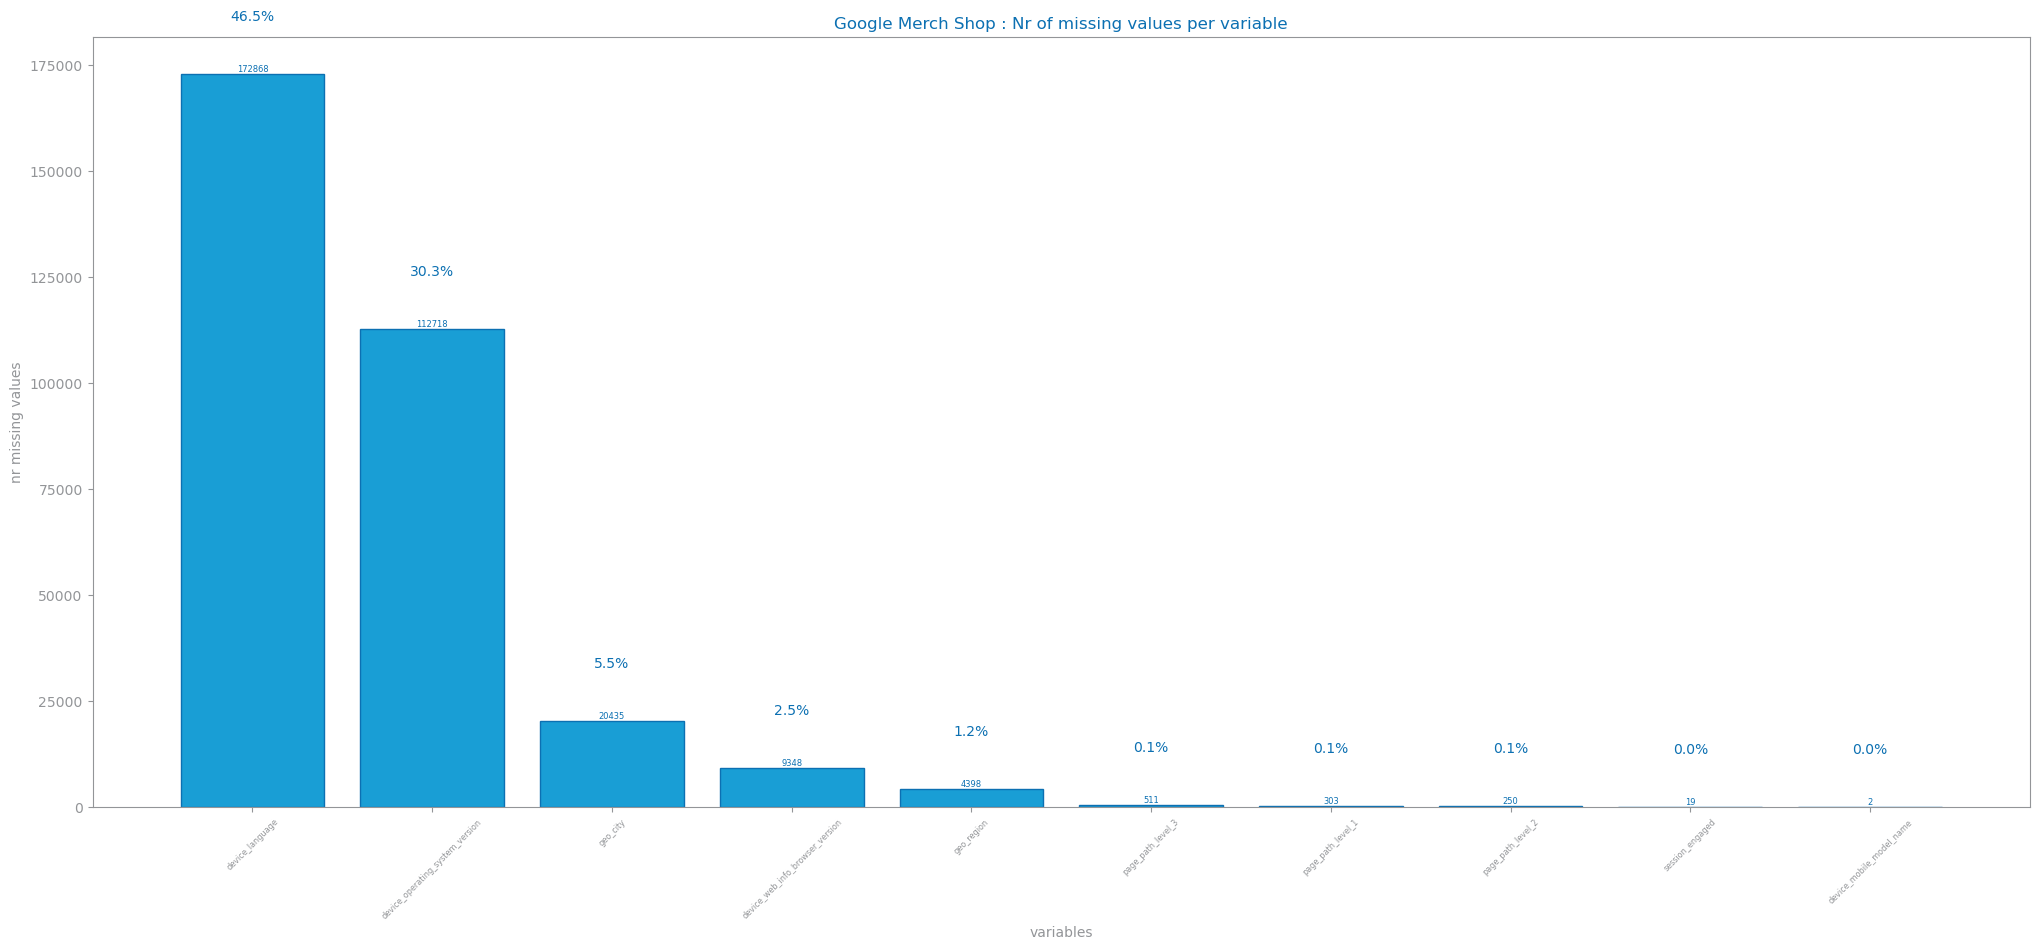

In [5]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

mv: dict[str, int] = {}
total_rows = len(data)

for var in data.columns:
    nr: int = data[var].isna().sum()
    if nr > 0:
        percentage = (nr / total_rows) * 100
        mv[var] = (nr, percentage)

sorted_mv = dict(sorted(mv.items(), key=lambda item: item[1][0], reverse=True))

variables = list(sorted_mv.keys())
missing_values = [val[0] for val in sorted_mv.values()]
percentages = [val[1] for val in sorted_mv.values()]

figure(figsize=(25, 10)) #(largura,altura) 

plot_bar_chart(
    variables,
    missing_values,
    title=f"{file_tag} : Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
for i, (var, perc) in enumerate(zip(variables, percentages)):
    text(i, missing_values[i] + max(missing_values) * 0.08, f"{perc:.1f}%", ha="center", va="center_baseline")

#savefig(f"./{file_tag}_mv.png")
show()

# MV 1 - Most Frequent Srategy

## MV1 strategy apply

In [6]:


# this script is available in data_functions originally from DSLabs site in Missing Values chapter

def apply_strategy_1(df):

    df_copy=apply_missing_values_frequent(df)

    return df_copy

data_1=apply_strategy_1(data)
data_1.describe()


,event_name,device_category,device_mobile_brand_name,device_mobile_model_name,device_operating_system,device_operating_system_version,device_language,device_web_info_browser,device_web_info_browser_version,geo_region,...,day_of_week_nr_cos,week_of_month_nr_sin,week_of_month_nr_cos,geo_country,session_engaged,returning_user,year,quarter,is_weekend,domain
count,371499.000000,371499.000000,371499.000000,371499.000000,371499.000000,371499.000000,371499.000000,371499.000000,371499.000000,371499.000000,...,371499.000000,3.714990e+05,371499.000000,371499.000000,371499.000000,371499.000000,371499.000000,371499.000000,371499.000000,371499.000000
mean,6.809294,1.815187,4.770839,10.426956,3.719991,4.574652,6.797459,2.192566,4.354385,2992.723504,...,0.085685,-3.502342e-02,-0.293118,1.146148,0.914867,0.258902,1.262025,1.262025,0.198708,1.965585
std,1.859296,0.971881,1.346077,3.010803,1.586564,2.428566,1.547939,0.640367,1.782915,1762.646155,...,0.744738,7.360874e-01,0.609125,0.353255,0.279081,0.438033,0.439737,0.439737,0.399029,0.182292
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-8.660254e-01,-1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,6.000000,1.000000,4.000000,8.000000,2.000000,2.000000,6.797459,2.000000,3.000000,1580.000000,...,-0.500000,-8.660254e-01,-0.500000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
50%,8.000000,1.000000,5.000000,10.000000,4.000000,4.574652,6.797459,2.000000,4.000000,3621.000000,...,0.500000,1.224647e-16,-0.500000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
75%,8.000000,3.000000,5.000000,12.000000,5.000000,5.000000,8.000000,3.000000,4.354385,4382.000000,...,1.000000,8.660254e-01,0.500000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,2.000000
max,13.000000,3.000000,9.000000,19.000000,6.000000,10.000000,8.000000,4.000000,11.000000,6491.000000,...,1.000000,8.660254e-01,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000


## MV1 train/test split 

Labels=[0.0, 1.0]


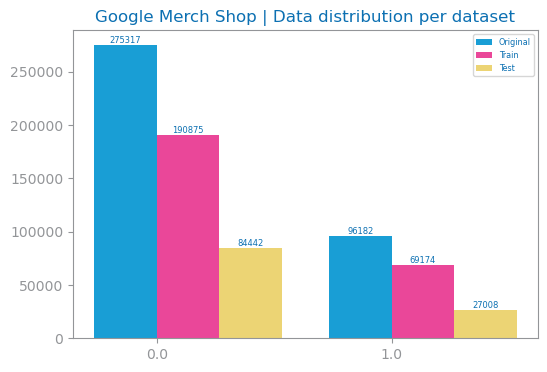

In [7]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart

from numpy import array, ndarray

y_1, X_1, labels, values = define_target_and_prepare_data(data_1, target)

# Call the function to split the data
train_1, test_1 = split_data_save_csv(pd.DataFrame(X_1, columns=data_1.columns), y_1, data_columns=data_1.columns, target_column=target)

# Distribution check
values["Train"] = [
    len(train_1[train_1[target] == 0]),
    len(train_1[train_1[target] == 1]),
]
values["Test"] = [
    len(test_1[test_1[target] == 0]),
    len(test_1[test_1[target] == 1]),
]

# Visualize the distribution
figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title=f"{file_tag} | Data distribution per dataset")
show()

## MV1 evaluate

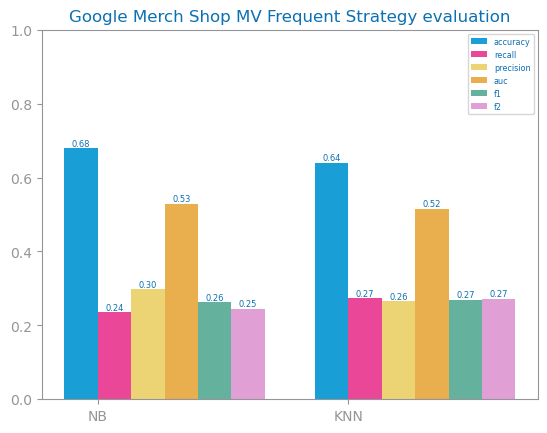

In [8]:
# evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
# removed Multinomial from run_NB function because dataset has negative values

figure()
eval_1: dict[str, list] = evaluate_approach(train_1, test_1, target='returning_user', metric=target_metric)
plot_multibar_chart(
    ["NB", "KNN"], eval_1, title=f"{file_tag} MV Frequent Strategy evaluation", percentage=True
)
savefig(f"images/{file_tag}_mv1_evaluation.png")
show()

# MV2 - drop null strategy

1. Remove 'device_language' and 'device_operating_system_version' due to high % of null values. Also, since we are not sure of its quality it makes more sense to remove it altogether without sacrificing the number of rows
2. Remove remaining null values records 

## MV2 strategy apply

In [9]:
def apply_strategy_2(df):

    df_copy=df.copy()

    drop_cols=['device_language','device_operating_system_version']
    
    df_copy=apply_missing_values_remove_cols_and_any_na_rows(df,drop_cols)

    return df_copy

data_2=apply_strategy_2(data)

## MV2 train/test split 

Labels=[0, 1]


<Axes: title={'center': 'Google Merch Shop | Data distribution per dataset'}>

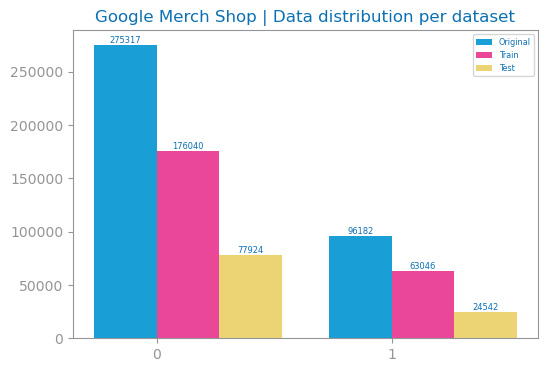

In [10]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart

# train/test split from DSLABS Classification/Evaluation Chapter
# created split_data_save_csv on data_functions

# Call the function to split the data
y_2, X_2, labels, class_counts = define_target_and_prepare_data(data_2, target=target)


train_2, test_2 = split_data_save_csv(pd.DataFrame(X_2, columns=data_2.columns), y_2, data_columns=data_2.columns, target_column=target)


values["Train"] = [
    len(train_2[train_2[target] == 0]),
    len(train_2[train_2[target] == 1]),
]
values["Test"] = [
    len(test_2[test_2[target] == 0]),
    len(test_2[test_2[target] == 1]),
]

figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title=f"{file_tag} | Data distribution per dataset")

## MV2 evaluate

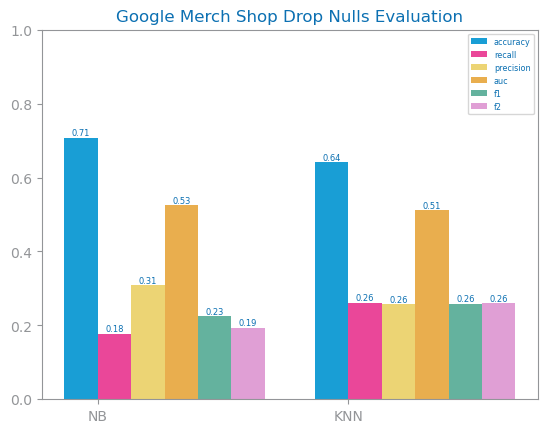

In [11]:

figure()
eval_2: dict[str, list] = evaluate_approach(train_2, test_2, target='returning_user', metric=target_metric)
plot_multibar_chart(
    ["NB", "KNN"], eval_2, title=f"{file_tag} Drop Nulls Evaluation", percentage=True
)
savefig(f"images/{file_tag}_mv2_evaluation.png")
show()

# Approach uplift comparison

## uplift df

In [12]:
algorithms = ['Naive Bayes', 'KNN']

# Create DataFrames for eval_1 and eval_2
df_eval_1 = pd.DataFrame(eval_1, index=algorithms)
df_eval_2 = pd.DataFrame(eval_2, index=algorithms)

# Calculate uplift
df_uplift = df_eval_2 - df_eval_1



# Combine everything into one DataFrame (without misalignment issues)
comparison_df = pd.concat([df_eval_1, df_eval_2, df_uplift], axis=1)
comparison_df.columns = pd.MultiIndex.from_product([['Approach 1', 'Approach 2', 'Uplift'], eval_1.keys()])



# Display the DataFrame
comparison_df

Approach 1                                                    \
              accuracy    recall precision       auc        f1        f2   
Naive Bayes   0.680188  0.235301  0.297728  0.528891  0.262859  0.245600   
KNN           0.639946  0.273734  0.264925  0.515405  0.269257  0.271925   

            Approach 2                                                    \
              accuracy    recall precision       auc        f1        f2   
Naive Bayes   0.707659  0.177247  0.308226  0.525979  0.225068  0.193710   
KNN           0.641842  0.261429  0.256753  0.511541  0.259070  0.260481   

               Uplift                                                    
             accuracy    recall precision       auc        f1        f2  
Naive Bayes  0.027471 -0.058053  0.010499 -0.002912 -0.037791 -0.051890  
KNN          0.001896 -0.012304 -0.008172 -0.003864 -0.010187 -0.011445

## t test

In [13]:

from scipy.stats import ttest_rel


# Perform paired t-tests for each metric
t_test_results = {'t_stat': [], 'p_value': []}
for metric in eval_1.keys():
    t_stat, p_value = ttest_rel(df_eval_1[metric], df_eval_2[metric])
    t_test_results['t_stat'].append(t_stat)
    t_test_results['p_value'].append(p_value)

# Create DataFrame for t-test results
df_ttest = pd.DataFrame(t_test_results, index=eval_1.keys())

# Convert t-test results to a DataFrame with MultiIndex and concatenate it
df_ttest_multi = pd.DataFrame({
    ('t_test', 't_stat'): df_ttest['t_stat'],
    ('t_test', 'p_value'): df_ttest['p_value']
})

df_ttest_multi

t_test          
             t_stat   p_value
accuracy  -1.148272  0.456131
recall     1.537904  0.367037
precision -0.124607  0.921079
auc        7.117972  0.088857
f1         1.738121  0.332370
f2         1.565953  0.361798

# Analysis

- Uplift between missing value input approaches is significant when it comes to recall (40% to 35% drop on mv2). every other metric does not show significant uplifts
- there is low difference in terms of data processing (with frequent approach taking about 2 mins more with a 20% of the original dataset sample)
- we will move forward with approach 1 for missing values due to slightly better results on recall and more records dimensionality


## UPDATE
- sample on 10% now
- focus on f2, recall and precision.

# save to csv

In [14]:
if test_data==False:
    
    data_copy=apply_strategy_1(data)
    
    data_copy.to_csv(f"data/df_merch_3_mv_input.csv", index=False)
    